In [29]:
from io import BytesIO

import boto3
from botocore import UNSIGNED
from botocore.config import Config
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))

bucket_name = "galaxy-morph-manifold-learning-processed"

paginator = s3.get_paginator('list_objects_v2')
page_iterator = paginator.paginate(Bucket=bucket_name)

all_files = []
for page in page_iterator:
    if 'Contents' in page:
        all_files.extend(page['Contents'])

print(f"Total number of files in the bucket: {len(all_files)}")

Total number of files in the bucket: 83286


In [ ]:
# Configure S3 client for anonymous access
s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))

# Specify the bucket name and object key
bucket_name = "galaxy-morph-manifold-learning-processed"



Image shape: (256, 256)


In [11]:
images = []

for i in range(1_000):
    object_key = all_files[i]["Key"]

    response = s3.get_object(Bucket=bucket_name, Key=object_key)
    file_stream = BytesIO(response['Body'].read())

    image = Image.open(file_stream)
    image_array = np.array(image)

    images.append(image_array)

In [12]:
len(images)

1000

In [24]:
images_array = np.array(images)

In [ ]:
# np.save("../../data/1k_processed_images.npy", images_array)

In [30]:
filenames = pd.DataFrame({"filename": list(map(lambda x: x["Key"], all_files[:1000]))})
filenames.head()

,filename
0,J000000.80+004200.0.png
1,J000001.03+003228.7.png
2,J000001.55-000533.3.png
3,J000001.85+004309.3.png
4,J000002.29-042805.0.png


In [ ]:
# filenames.to_csv("../../data/1k_processed_images.csv", index=False)

In [ ]:
images_array.resha

In [102]:
# from sklearn.datasets import load_digits
from sklearn.manifold import locally_linear_embedding

embedding, _ = locally_linear_embedding(images_array.reshape(1_000, 256*256),n_neighbors=10, n_components=2)
embedding.shape

(1000, 2)

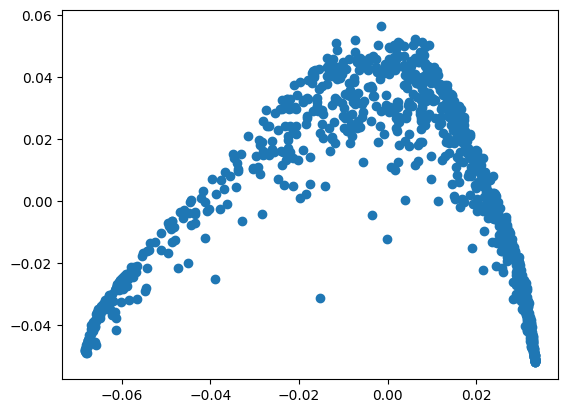

In [103]:
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.show();

In [100]:
from sklearn.datasets import load_digits
from sklearn.manifold import locally_linear_embedding
X, y = load_digits(return_X_y=True)

N = 2_000

X = X[:N]
y = y[:N]

embedding, _ = locally_linear_embedding(X, n_neighbors=15, n_components=2)
embedding.shape

(1797, 2)

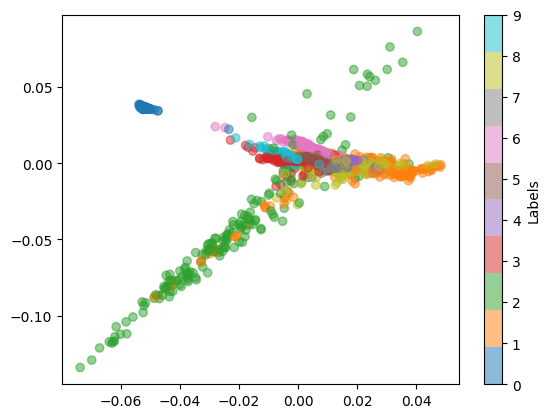

In [101]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap="tab10", alpha=0.5)
plt.colorbar(label="Labels")
plt.show();